# Seaborn Exercises

<hr style="border:2px solid gray">

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
from env import host, username, password
%matplotlib inline

<hr style="border:2px solid black">

## PART I:

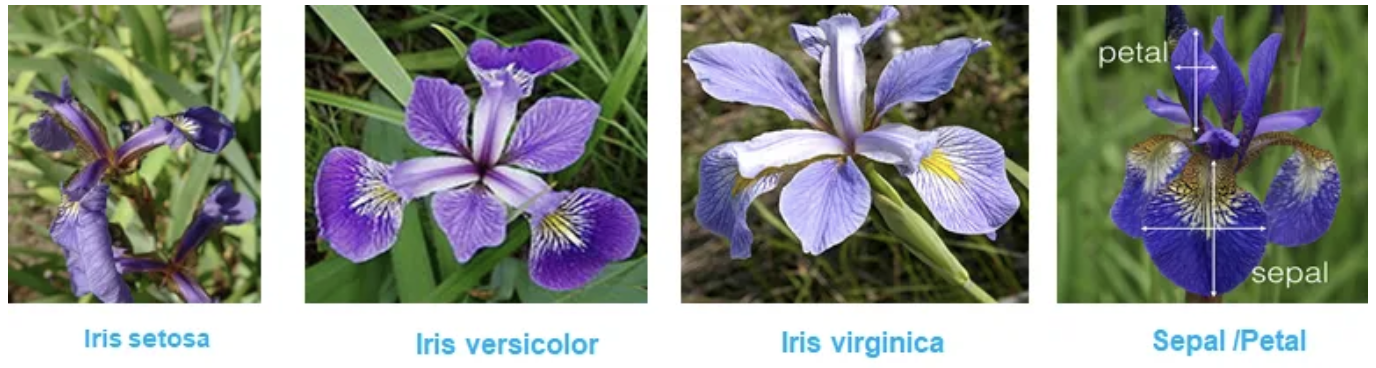

#### Use the iris database to answer the following quesitons:
1. What does the distribution of petal lengths look like?
2. Is there a correlation between petal length and petal width?
3. Would it be reasonable to predict species based on sepal width and sepal length?
4. Which features would be best used to predict species?

In [2]:
#load iris dataset from seaborn
iris = sns.load_dataset('iris')

In [3]:
#get to know the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<hr style="border:2px solid grey">

### #1. What does the distribution of petal lengths look like?

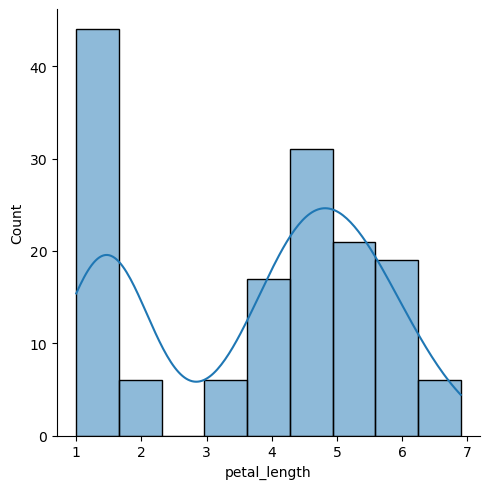

In [5]:
sns.displot(data = iris, x='petal_length', kde=True)
plt.show()

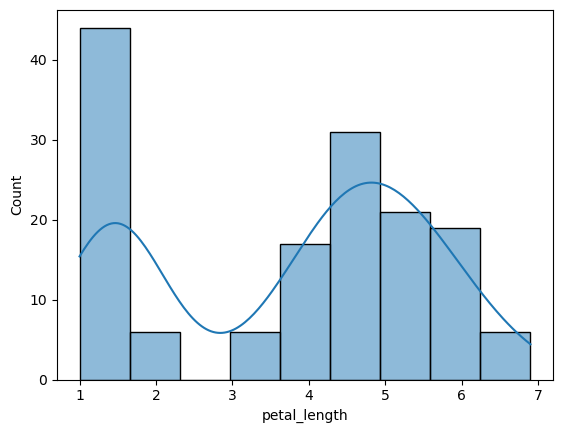

In [6]:
sns.histplot(data=iris, x='petal_length', kde=True)
plt.show()

<div class="alert alert-block alert-success">
<b>NOTE:</b>
    
```sns.histplot``` and ```sns.displot``` are very similar. The primary differences are contained in the kwargs for each visual.
</div>

<hr style="border:2px solid grey">

### #2. Is there a relationship between petal length and petal width?
- <b>Answer</b>: It appears that (in general) the longer the petal, the wider the petal

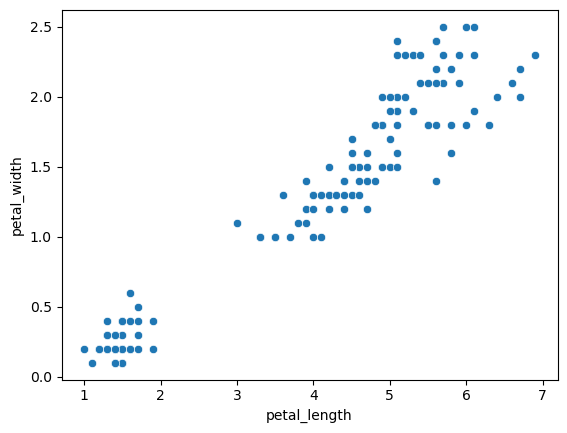

In [7]:
#visual length and width of petals together
sns.scatterplot(data = iris, x='petal_length', y='petal_width')
plt.show()

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

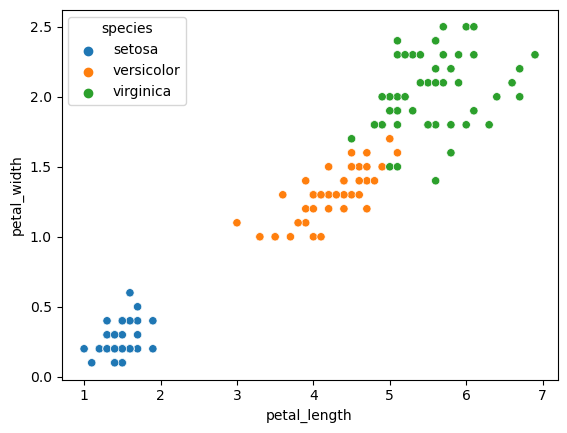

In [8]:
#does species matter?
sns.scatterplot(data = iris, x='petal_length', y='petal_width', hue= 'species')

<hr style="border:2px solid grey">

### #3 Would it be reasonable to predict species based on sepal width and sepal length?
- <b>Answer</b>:
    - MAY be able to predict 'setosa' based on sepal size
        - Setosa (blue) have shorter sepal lengths/ are wider
    - Versicolor (orange) and Virginic (green) aer too similar


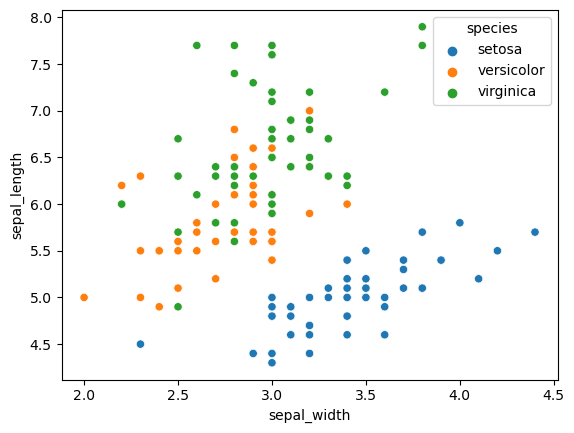

In [9]:
#does species matter?
sns.scatterplot(data = iris, x='sepal_width',y='sepal_length', hue= 'species')
plt.show()

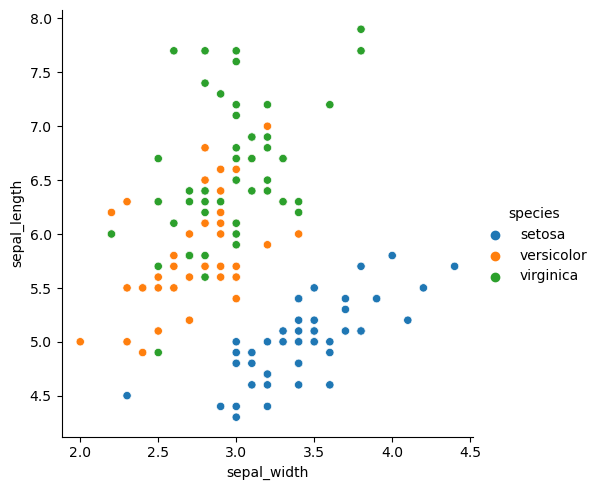

In [10]:
#try using relplot
sns.relplot(data = iris, x='sepal_width', y='sepal_length', hue= 'species')
plt.show()

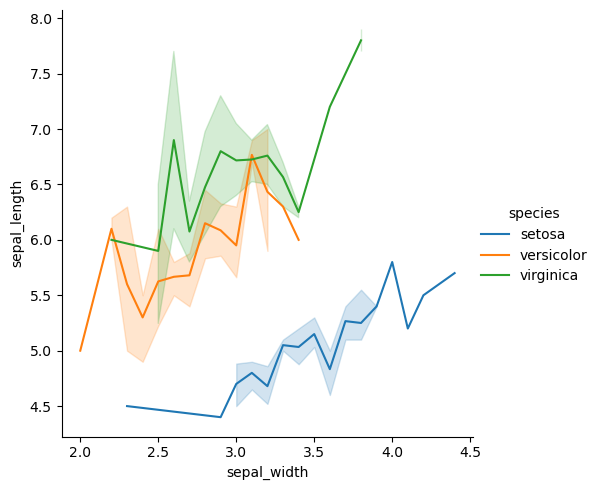

In [11]:
#let's change the individual points of a relplot into a line
#this will make it easier to visualize differences in species
sns.relplot(data = iris, x='sepal_width', y='sepal_length', hue ='species', kind='line')
plt.show()

<div class="alert alert-block alert-success">
<b>NOTE:</b>
    
```sns.relplot``` and ```sns.scatterplot``` are very similar. The primary differences are contained in the kwargs for each visual.
</div>

<hr style="border:2px solid grey">

### #4. Which features would be best used to predict species?
- <b>Answer</b>: petal_length

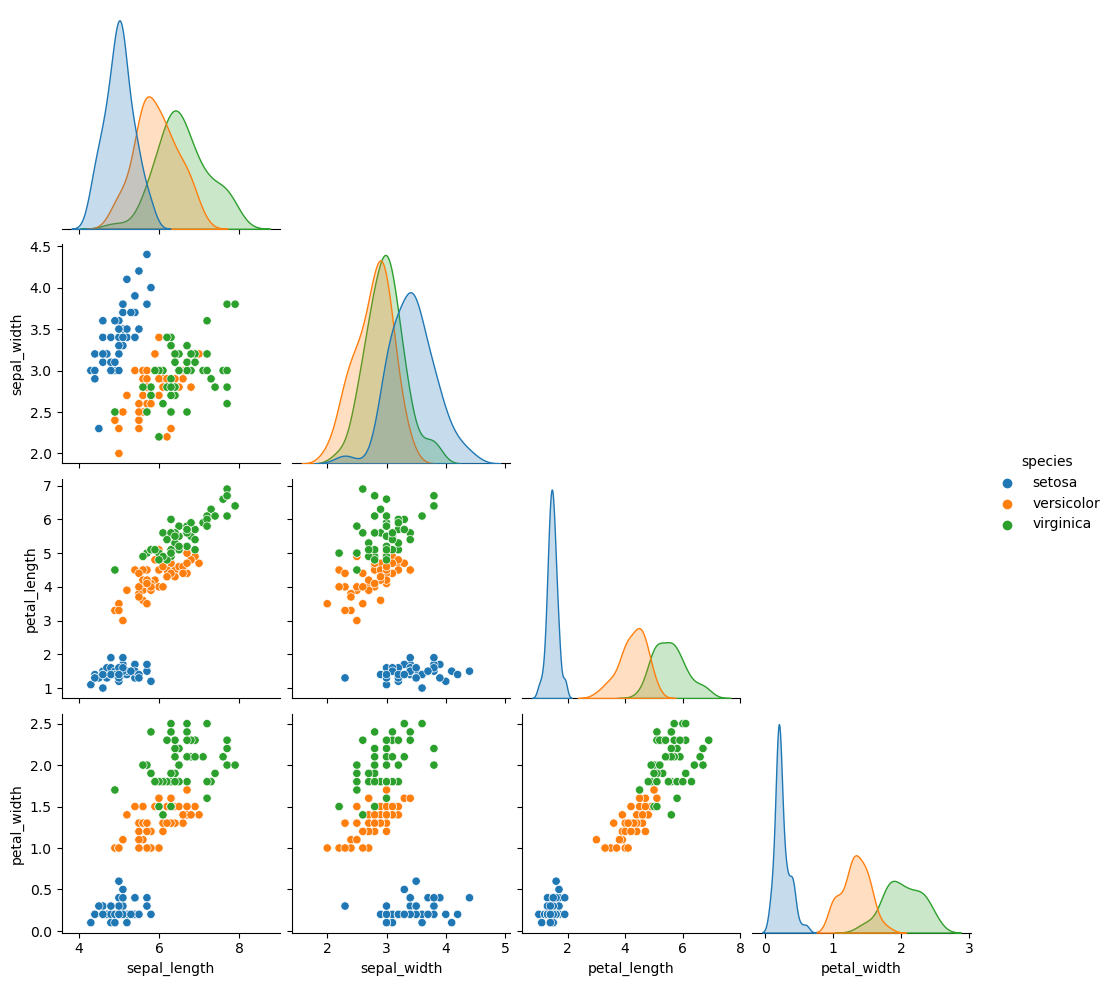

In [12]:
#create a pairplot to see all features
sns.pairplot(data=iris, corner=True, hue='species')
plt.show()

In [13]:
#group by species and see if there is a wide range between petal lengths
#this gives average petal length
iris.groupby('species').petal_length.agg('mean')

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

In [14]:
iris.groupby('species').petal_width.agg('mean')

species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

In [15]:
iris.groupby('species').sepal_length.agg('mean')

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [16]:
iris.groupby('species').sepal_width.agg('mean')

species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64

<div class="alert alert-block alert-info"> 
<b>Takeaway:</b> 

The average petal length for each species appears to have the largest variation among species, compared to the other features. This could mean that ```petal_length``` would be a good indictor of the species we are dealing with.
</div>

<hr style="border:2px solid black">
<hr style="border:2px solid black">

# PART II:

1. Load the ```anscombe``` dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

    - 1b. Plot the x and y values from the ```anscombe``` data. Each dataset should be in a separate column.


2. Load the ```InsectSprays``` dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.


3. Load the ```swiss``` dataset and read it's documentation. Create visualizations to answer the following questions:

    - 3a. Create an attribute named ```is_catholic``` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    
    - 3b. Does whether or not a province is Catholic influence fertility?
    
    - 3c. What measure correlates most strongly with fertility?


4. Using the ```chipotle``` dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.


5. Load the ```sleepstudy``` data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

<hr style="border:1px solid black">

### #1. Load the ```anscombe``` dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

- <b>Answer</b>: 
    - in ' x' : I noticed that the only dataset that is different is dataset IV
    - in 'y': dataset III and IV are very similar

In [17]:
#load anscombe using seaborn
anscombe = sns.load_dataset('anscombe')

In [18]:
#take a look at the data
anscombe.sample(10)

,dataset,x,y
34,IV,8.0,5.76
3,I,9.0,8.81
29,III,4.0,5.39
42,IV,8.0,7.91
31,III,7.0,6.42
35,IV,8.0,7.71
7,I,4.0,4.26
23,III,8.0,6.77
39,IV,8.0,5.25
32,III,5.0,5.73


In [19]:
#what datatypes do we have
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [20]:
#how many of each dataset do we have
anscombe.dataset.value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

In [21]:
#let's group the datasets together then get stats on them
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

<hr style="border:1px solid grey">

###  #1b. Plot the x and y values from the ```anscombe``` data. Each dataset should be in a separate column.

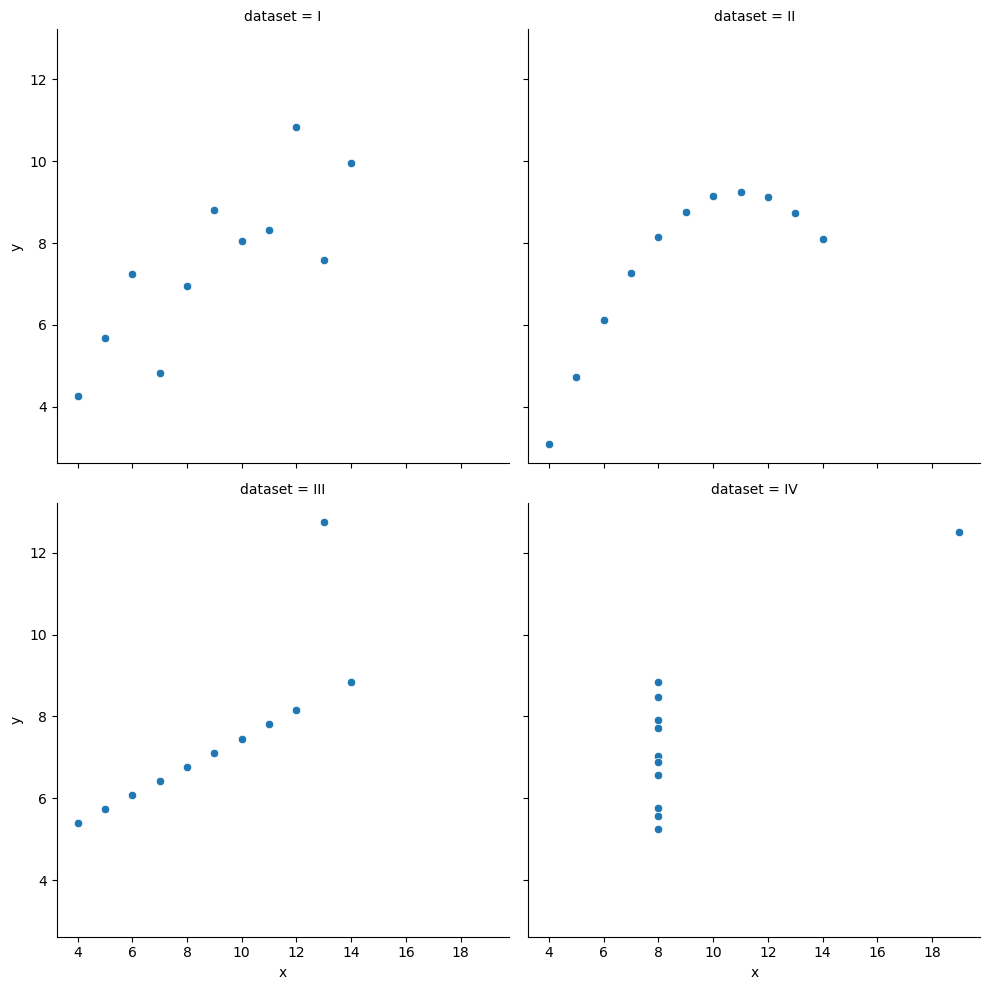

In [22]:
sns.relplot(data=anscombe, x='x', y='y', col='dataset', col_wrap= 2)

<div class="alert alert-block alert-info"> 
<b>Takeaway:</b> 

- Although the descriptive statistics appear to be very similar among all four datasets, the visuals are different. This indicates that stats and visuals must be reviewed together or only part of the story will be told.
</div>

<hr style="border:2px solid black">

### #2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [23]:
insect = data('InsectSprays')

In [24]:
#let's look at what this dataframe holds
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [25]:
#look at the data
insect.sample(10)

,count,spray
64,22,F
19,17,B
23,7,B
49,3,E
40,6,D
67,13,F
57,3,E
56,1,E
27,7,C
65,15,F


In [26]:
#see how many of each spray type there are
insect.spray.value_counts()

A    12
B    12
C    12
D    12
E    12
F    12
Name: spray, dtype: int64

In [27]:
#get the count (of kills) per spray type
insect.groupby('spray').agg('sum')

,count
spray,
A,174
B,184
C,25
D,59
E,42
F,200


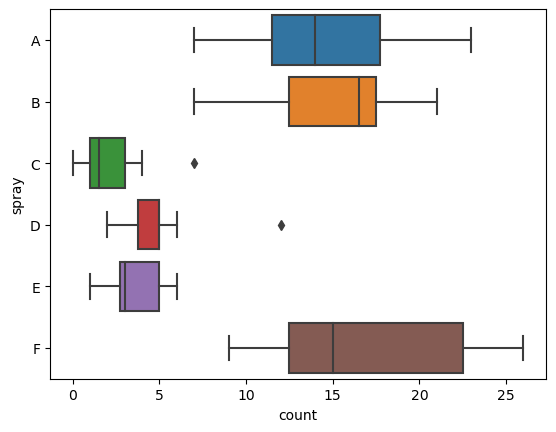

In [28]:
sns.boxplot(data= insect, x ='count', y ='spray')
plt.show()

<div class="alert alert-block alert-info"> 
<b>Takeaway:</b> 

- Spray type F appears to have the highest insect kill count. 
- It appears that Spray type C is the least effective

</div>

<hr style="border:2px solid black">

### #3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [29]:
#load the swiss data using pydataset
swiss = data('swiss')

In [30]:
#see what information is within that dataset
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [31]:
#take a look
swiss.sample(10)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Val de Ruz,77.6,37.6,15,7,4.97,20.0
Le Locle,72.7,16.7,22,13,11.22,18.9
Rive Gauche,42.8,27.7,22,29,58.33,19.3
ValdeTravers,67.6,18.7,25,7,8.65,19.5
Morges,65.5,59.8,22,10,5.23,18.0
Neuveville,76.9,43.5,17,15,5.16,20.6
La Chauxdfnd,65.7,7.7,29,11,13.79,20.5
Broye,83.8,70.2,16,7,92.85,23.6
Aigle,64.1,62.0,21,12,8.52,16.5
Lavaux,65.1,73.0,19,9,2.84,20.0


<hr style="border:2px solid grey">

### #3a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [32]:
#chose cutoff point of 50% for is_catholic
#create a column where True if the percent of catholic is above 50%
swiss['is_catholic'] = swiss['Catholic'] >50 

#take a look
swiss.sample(10)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Rive Gauche,42.8,27.7,22,29,58.33,19.3,True
Yverdon,65.4,49.5,15,8,6.10,22.5,False
Aigle,64.1,62.0,21,12,8.52,16.5,False
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Lavaux,65.1,73.0,19,9,2.84,20.0,False
Lausanne,55.7,19.4,26,28,12.11,20.2,False
Entremont,69.3,84.9,7,6,99.68,19.8,True
La Vallee,54.3,15.2,31,20,2.15,10.8,False
Aubonne,66.9,67.5,14,7,2.27,19.1,False
Morges,65.5,59.8,22,10,5.23,18.0,False


<hr style="border:2px solid grey">

### #3b. Does whether or not a province is Catholic influence fertility?

In [33]:
#what is the average rate of Fertility among catholic vs non-catholic
swiss.groupby('is_catholic').Fertility.agg('mean')

is_catholic
False    66.220690
True     76.461111
Name: Fertility, dtype: float64

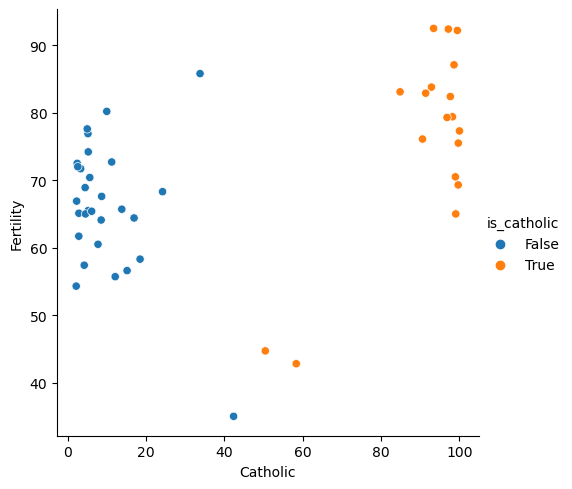

In [34]:
#here we are plotting catholic vs non-catholic fertility rates
sns.relplot(data = swiss, x= 'Catholic', y= 'Fertility', hue = 'is_catholic')
plt.show()

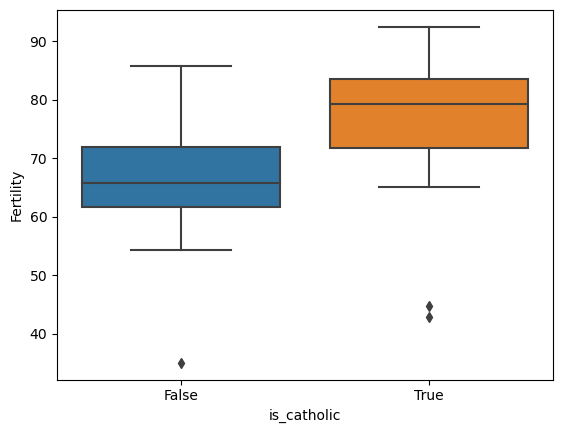

In [35]:
#create the visual of catholic vs non-catholic fertility rates
sns.boxplot(data = swiss, x= 'is_catholic', y= 'Fertility')
plt.show()

<div class="alert alert-block alert-info"> 
<b>Takeaway:</b> 

- It appears that provinces that have primarily Catholic population <b>do</b> have a higher fertility rate.
- Average fertility rate for Non-Catholic is 66.22 while Catholic is 76.46.

</div>

<hr style="border:2px solid grey">

### #3c. What measure correlates most strongly with fertility?
- <b>Answer</b>: education (negative correlation)

In [36]:
#take a look at the numeric correlation between all features
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


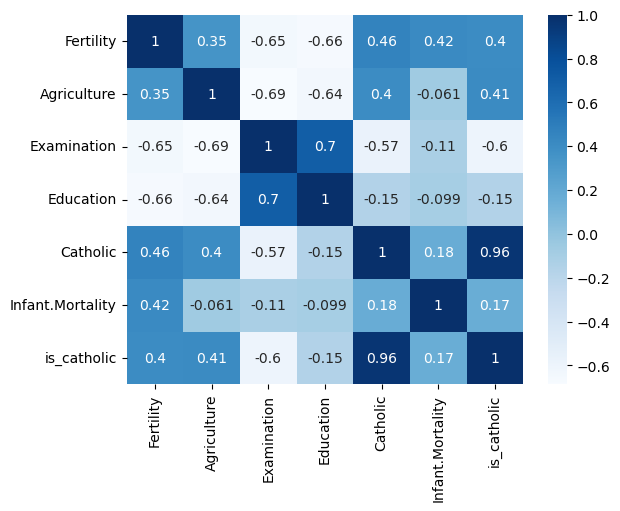

In [37]:
#we can create a heatmap of this correlation
sns.heatmap(swiss.corr(), annot=True, cmap='Blues')
plt.show()

Fertility


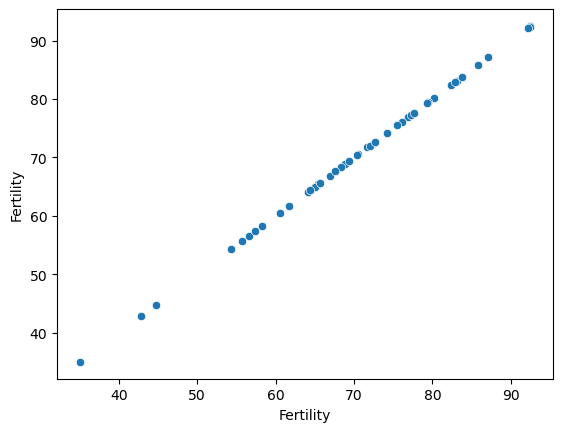

Agriculture


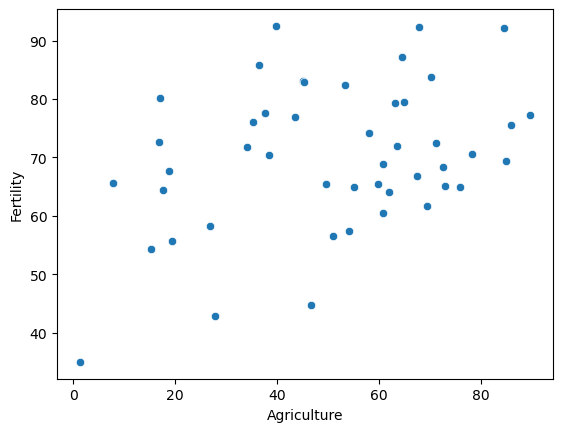

Examination


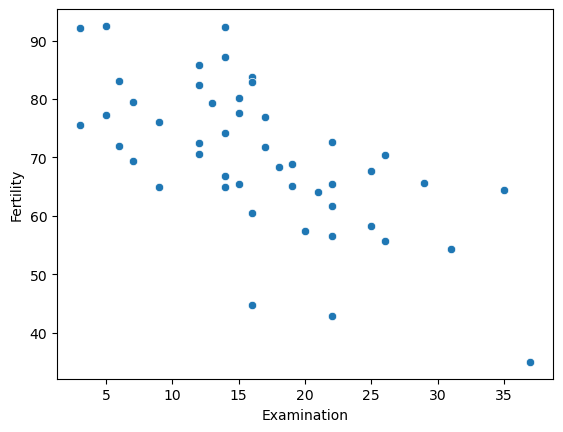

Education


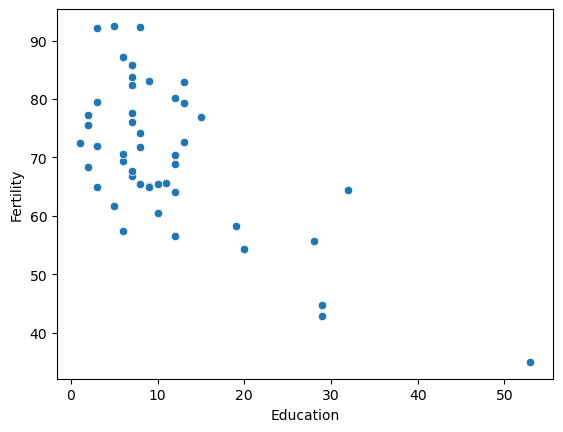

Catholic


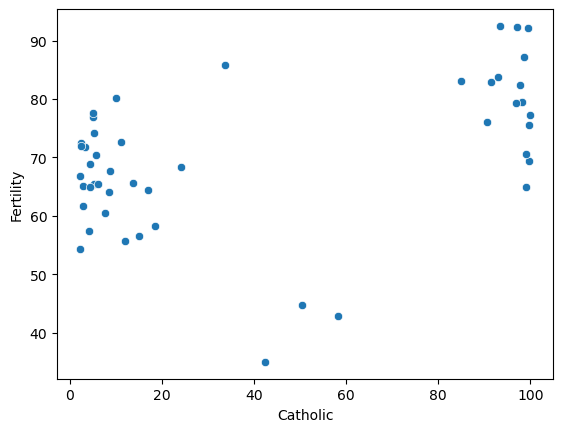

Infant.Mortality


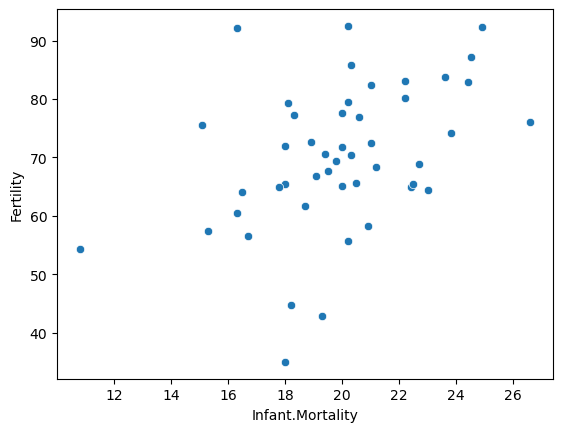

is_catholic


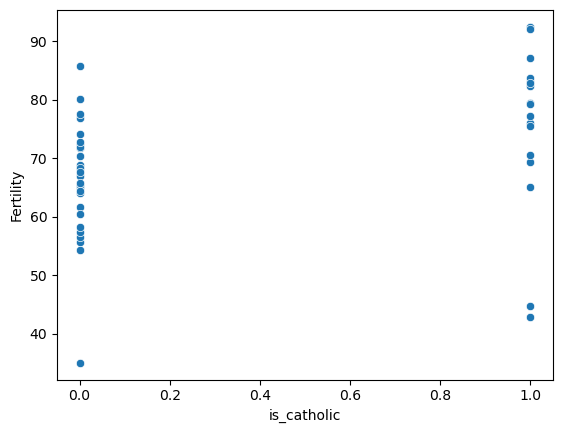

In [38]:
#we can create a for loop to see Fertility
for col in swiss:
    print(col)
    sns.scatterplot(data=swiss, y='Fertility', x=col)
    plt.show()

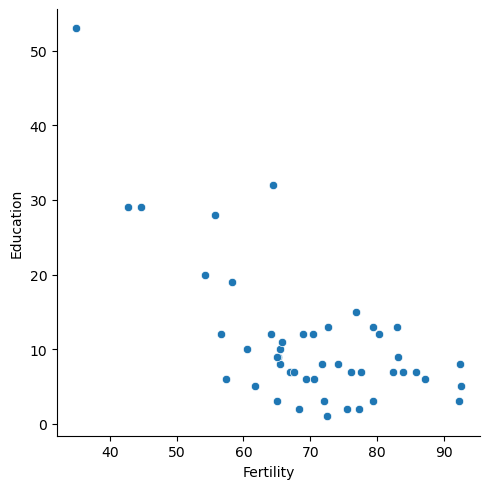

In [39]:
#the more educated someone is the less fertile they are
sns.relplot(data= swiss, x='Fertility', y='Education')

<div class="alert alert-block alert-info"> 
<b>Takeaway:</b> 

- Education appears to be most highly correlated with Fertility. There appears to be a strong negative correlation between the two features.

</div>

<hr style="border:2px solid black">

### #4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [40]:
url = f'mysql+pymysql://{username}:{password}@{host}/chipotle'

In [41]:
def get_db_url(user, password, host, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'


In [42]:
chipotle = pd.read_sql('SELECT * FROM orders', url)
chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [43]:
#check the dtypes
chipotle.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [44]:
#remove special characters and change datatypes
chipotle.item_price = chipotle.item_price.str.strip('$').astype(float)

In [45]:
#finding top four items by quantity sold
top_4 = chipotle.groupby('item_name').quantity.sum().nlargest(4)
top_4

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [46]:
#another way to do this using sort values
top_four= chipotle.groupby('item_name').quantity.agg(['sum']).sort_values(by='sum', ascending = False).head(4)
top_four

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386


In [47]:
#get all the total prices per item name
all_prices = chipotle.groupby('item_name').item_price.sum()

#take a look
all_prices.head()

item_name
6 Pack Soft Drink        356.95
Barbacoa Bowl            672.36
Barbacoa Burrito         894.75
Barbacoa Crispy Tacos    120.21
Barbacoa Salad Bowl      106.40
Name: item_price, dtype: float64

In [48]:
merged_df = pd.merge(top_4, all_prices, on='item_name', how='inner')
merged_df = merged_df.reset_index()
merged_df

,item_name,quantity,item_price
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


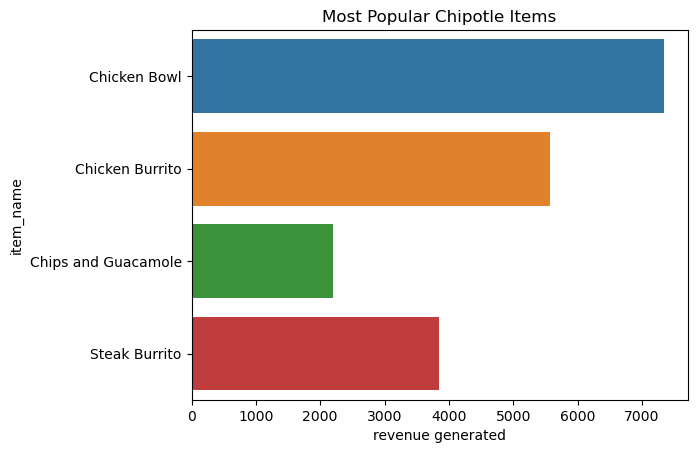

In [49]:
#create the plot
sns.barplot(data= merged_df, y='item_name', x='item_price')

#add title and label
plt.title('Most Popular Chipotle Items')
plt.xlabel('revenue generated')
plt.show()

<div class="alert alert-block alert-info"> 
<b>Takeaway:</b> 

- Chicken bowls have the highest revenue, followed by Chicken Burrito, Chips & Guac, and Steak Burritos.

</div>

<hr style="border:2px solid black">

### #5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [50]:
#load sleepstudy data using pydataset
sleepstudy = data('sleepstudy')

In [51]:
#take a look at the doc
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [52]:
sleepstudy.sample(10)

,Reaction,Days,Subject
58,346.8311,7,332
31,321.5426,0,330
11,222.7339,0,309
167,259.2658,6,371
47,290.0750,6,331
14,204.7070,3,309
154,240.4730,3,370
164,281.7895,3,371
158,347.5855,7,370
180,364.1236,9,372


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

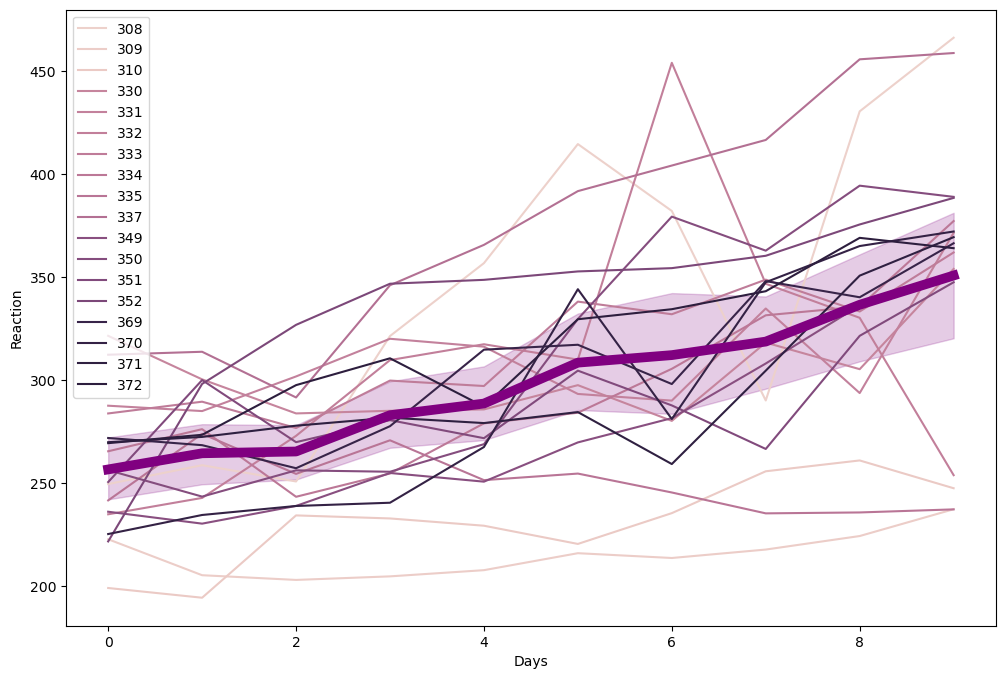

In [53]:
#determine figure size
plt.figure(figsize=(12,8))

#create the visual for subjects
sns.lineplot(data= sleepstudy, x= 'Days', y= 'Reaction', hue= 'Subject', legend =all)

#create the visual for mean reaction time
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'purple', linewidth = 7, estimator = 'mean')

In [54]:
#we will need to change the Subject datatype to a string
sleepstudy.Subject = sleepstudy.Subject.astype(str)

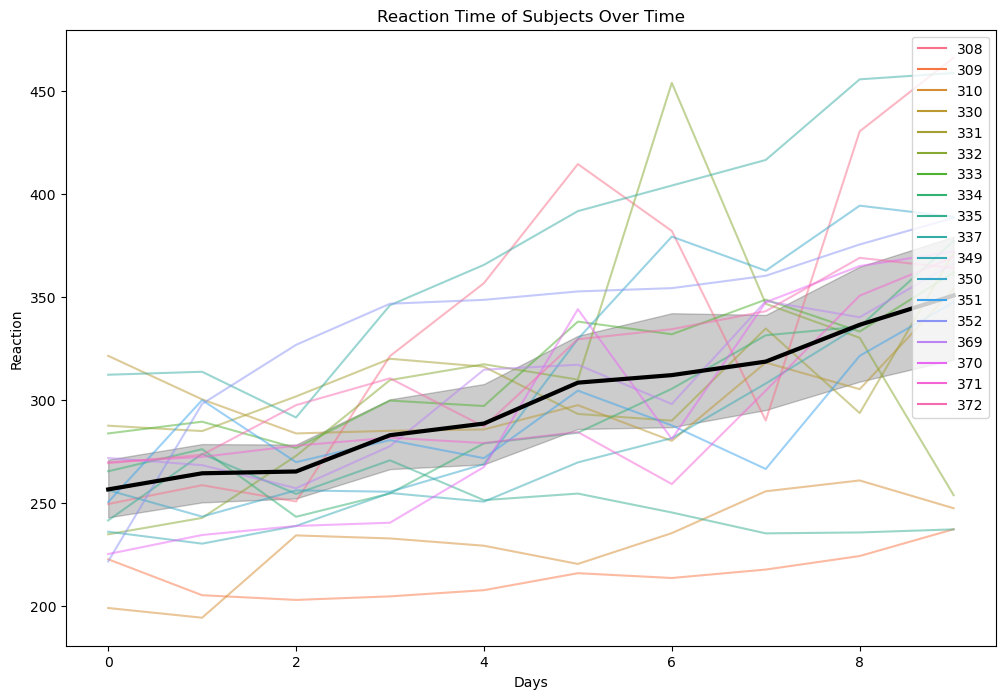

In [55]:
#now, with the Subject as a string- it is easier to visualize
plt.figure(figsize=(12,8))

sns.lineplot(data=sleepstudy, x='Days', y='Reaction', hue='Subject', alpha=.5)
sns.lineplot(data=sleepstudy, x='Days', y='Reaction', 
             color = 'black', linewidth=3)

plt.title('Reaction Time of Subjects Over Time')
plt.legend(loc='upper right')
plt.show()